In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
serie = pd.read_csv(
    "../data/processed/serie_mensual.csv",
    index_col=0,
    parse_dates=True
).squeeze()

In [3]:
s = 12
train = serie.iloc[:-s]
test = serie.iloc[-s:]

In [4]:
# Transformación logarítmica
train = np.log(train)

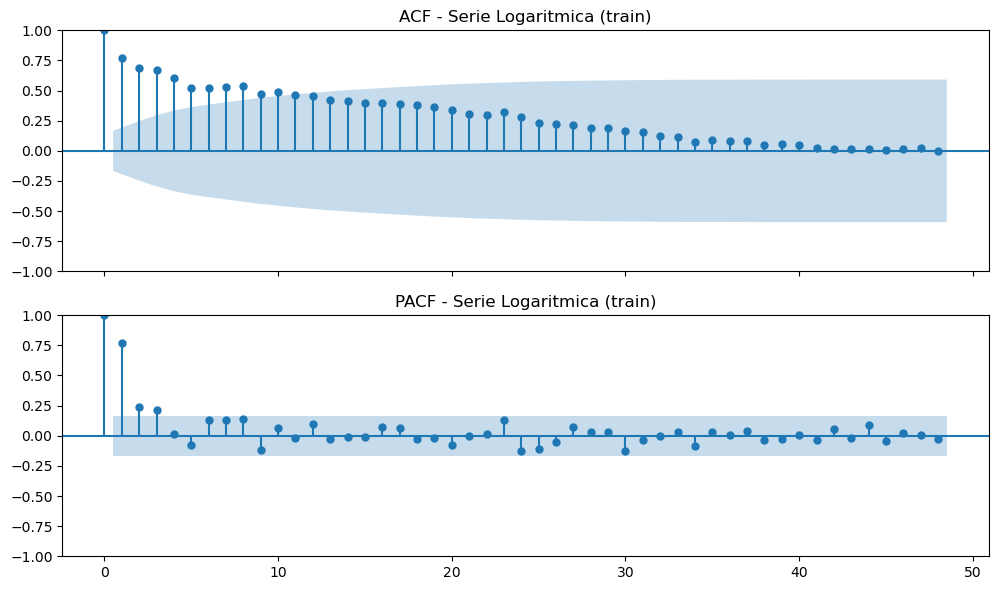

In [5]:
# -----------------------------
# 3) ACF / PACF (train)
# -----------------------------
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
plot_acf(train, lags=48, alpha=0.05, ax=ax[0])
ax[0].set_title("ACF - Serie Logaritmica (train)")
plot_pacf(train, lags=48, alpha=0.05, ax=ax[1], method="ywm")
ax[1].set_title("PACF - Serie Logaritmica (train)")
plt.tight_layout()
plt.show()

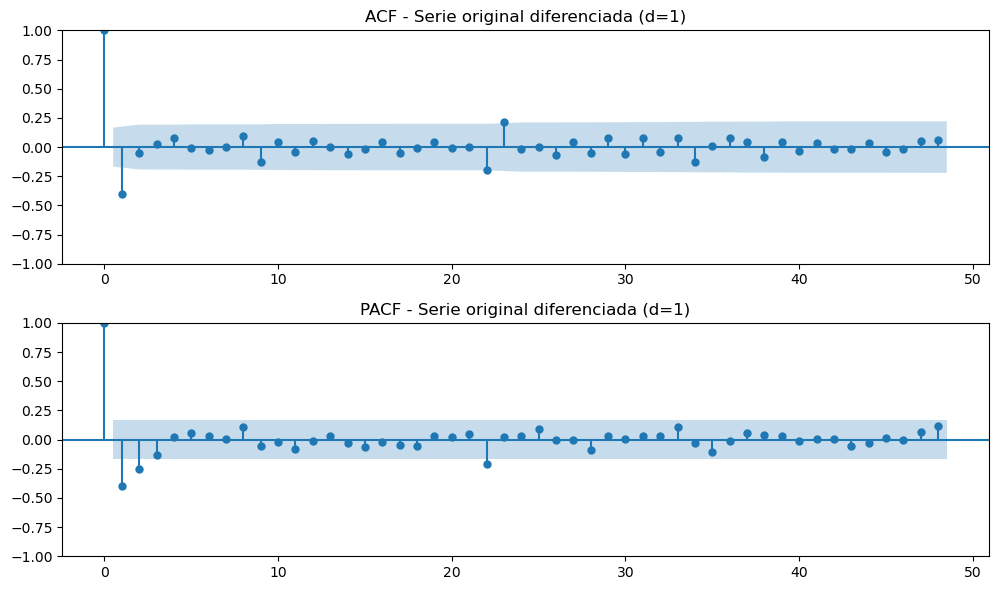

In [ ]:
# Diferenciación de primer orden
serie_diff = train.diff().dropna()

# Graficar
fig, ax = plt.subplots(2,1, figsize=(10,6))
plot_acf(serie_diff, lags=48, ax=ax[0])
ax[0].set_title("ACF - Serie Logaritmica diferenciada (d=1)")
plot_pacf(serie_diff, lags=48, ax=ax[1], method="ywm")
ax[1].set_title("PACF - Serie Logaritmica diferenciada (d=1)")
plt.tight_layout()
plt.show()

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Modelo 1

In [16]:
order = (0, 0, 1)
seasonal_order = (0, 1, 1, 12)

In [17]:
model = SARIMAX(
    train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False,
    freq='MS'
)

c:\Users\danie\anaconda3\envs\mineria_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [18]:
res = model.fit(disp=False)

In [19]:
print(res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                  138
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                 135.171
Date:                            mar, 24 feb 2026   AIC                           -264.342
Time:                                    00:38:12   BIC                           -256.187
Sample:                                02-01-2007   HQIC                          -261.034
                                     - 07-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2714      0.088      3.095      0.002       0.100       0.443
ma.S.L12      -0.1918      0.093   

NameError: name 'IMG_DIAGNOSTICS' is not defined

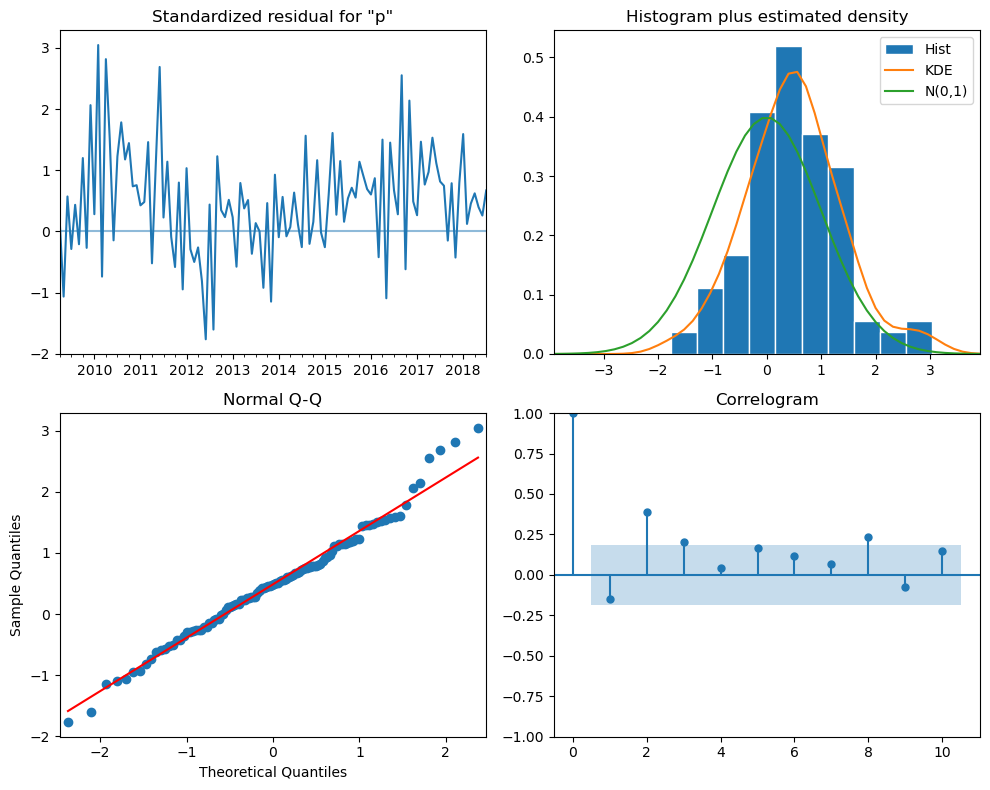

In [20]:
fig = res.plot_diagnostics(figsize=(10, 8))
fig.tight_layout()
fig.savefig(IMG_DIAGNOSTICS, dpi=150)
fig.show()

In [22]:
test = np.log(test)

In [23]:
forecast = res.get_forecast(steps=len(test))
pred = forecast.predicted_mean

mae = mean_absolute_error(test, pred)
rmse = np.sqrt(mean_squared_error(test, pred))

print("ARIMA(0,1,1) - Dataset original")
print("MAE:", mae)
print("RMSE:", rmse)

ARIMA(0,1,1) - Dataset original
MAE: 0.03497800675048671
RMSE: 0.042081541951188156


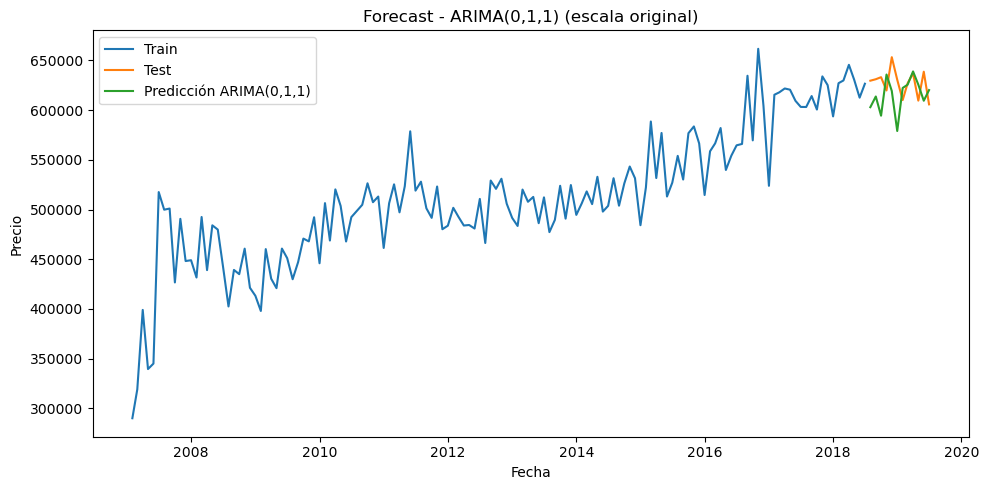

In [25]:
# 7) Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(np.exp(train), label="Train")
plt.plot(np.exp(test), label="Test")
plt.plot(np.exp(pred), label="Predicción ARIMA(0,1,1)")
plt.title("Forecast - ARIMA(0,1,1) (escala original)")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

### Modelo 2

In [ ]:
order = (1, 0, 1)
seasonal_order = (0, 0, 0, 12)

In [ ]:
model = SARIMAX(
    train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False,
    freq= 'MS'
)

c:\Users\danie\anaconda3\envs\mineria_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
res = model.fit(disp=False)

In [ ]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  137
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 149.812
Date:                dom, 22 feb 2026   AIC                           -293.623
Time:                        16:54:55   BIC                           -284.908
Sample:                    03-01-2007   HQIC                          -290.082
                         - 07-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9994      0.001    769.932      0.000       0.997       1.002
ma.L1         -1.0000    939.623     -0.001      0.999   -1842.628    1840.628
sigma2         0.0061      5.766      0.001      0.9

### Modelo 3

In [ ]:
order = (0, 0, 2)
seasonal_order = (0, 0, 0, 12)

model = SARIMAX(
    train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

c:\Users\danie\anaconda3\envs\mineria_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\danie\anaconda3\envs\mineria_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:

res = model.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  137
Model:               SARIMAX(0, 0, 2)   Log Likelihood                  83.712
Date:                dom, 22 feb 2026   AIC                           -161.425
Time:                        17:05:24   BIC                           -152.731
Sample:                    03-01-2007   HQIC                          -157.892
                         - 07-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4169      0.078      5.333      0.000       0.264       0.570
ma.L2          0.5106      0.088      5.828      0.000       0.339       0.682
sigma2         0.0167      0.002      8.825      0.0

### Modelo 4

In [ ]:
order = (1, 0, 2)
seasonal_order = (0, 0, 0, 12)

model = SARIMAX(
    train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

res = model.fit(disp=False)
print(res.summary())

c:\Users\danie\anaconda3\envs\mineria_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\danie\anaconda3\envs\mineria_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  137
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 175.104
Date:                dom, 22 feb 2026   AIC                           -342.207
Time:                        17:09:55   BIC                           -330.616
Sample:                    03-01-2007   HQIC                          -337.497
                         - 07-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.000   3032.824      0.000       0.999       1.001
ma.L1         -1.7492    471.867     -0.004      0.997    -926.592     923.094
ma.L2          0.7492    353.500      0.002      0.9

### Modelo 5

In [6]:
order = (0, 1, 1)
seasonal_order = (0, 0, 0, 12)

In [9]:
model = SARIMAX(
    train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False,
    freq= 'MS'
)

res = model.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  138
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 176.782
Date:                Tue, 24 Feb 2026   AIC                           -349.564
Time:                        00:20:56   BIC                           -343.754
Sample:                    02-01-2007   HQIC                          -347.203
                         - 07-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6040      0.043    -13.950      0.000      -0.689      -0.519
sigma2         0.0043      0.000     19.025      0.000       0.004       0.005
Ljung-Box (L1) (Q):                   0.02   Jarque-

c:\Users\danie\anaconda3\envs\mineria_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [11]:
test = np.log(test)

In [12]:
forecast = res.get_forecast(steps=len(test))
pred = forecast.predicted_mean

mae = mean_absolute_error(test, pred)
rmse = np.sqrt(mean_squared_error(test, pred))

print("ARIMA(0,1,1) - Dataset original")
print("MAE:", mae)
print("RMSE:", rmse)

ARIMA(0,1,1) - Dataset original
MAE: 0.018135888694183144
RMSE: 0.021384921792725442


NameError: name 'IMG_DIAGNOSTICS' is not defined

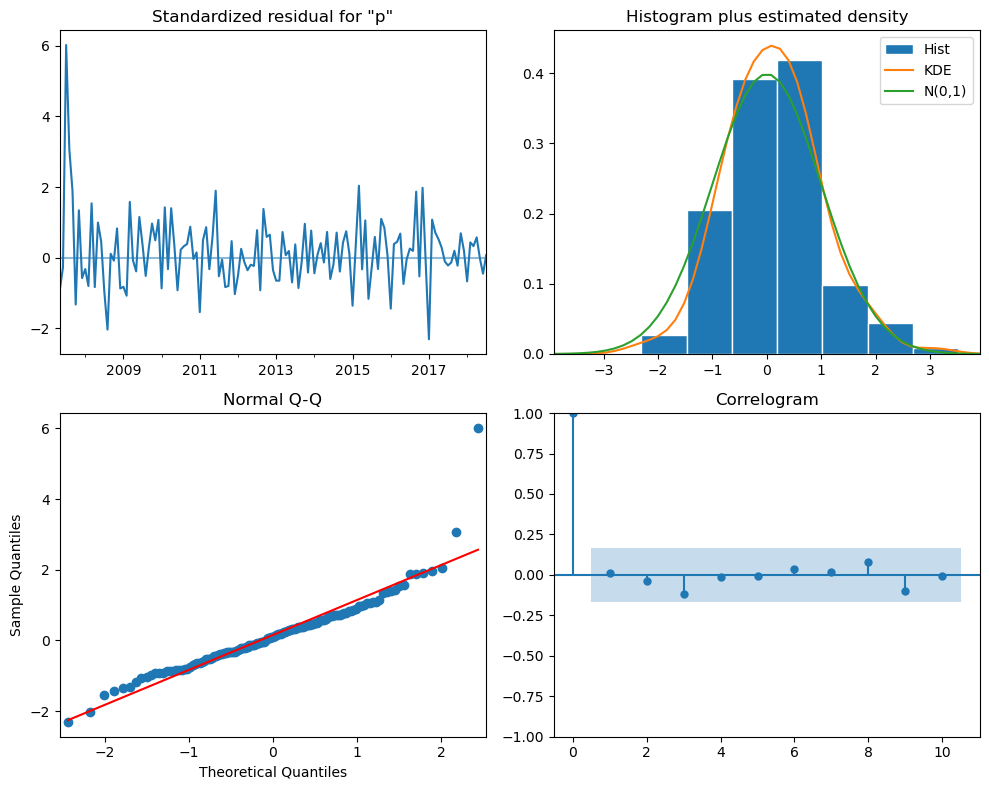

In [ ]:
fig = res.plot_diagnostics(figsize=(10, 8))
fig.tight_layout()
fig.show()

In [13]:
pred

2018-08-01    13.345139
2018-09-01    13.345139
2018-10-01    13.345139
2018-11-01    13.345139
2018-12-01    13.345139
2019-01-01    13.345139
2019-02-01    13.345139
2019-03-01    13.345139
2019-04-01    13.345139
2019-05-01    13.345139
2019-06-01    13.345139
2019-07-01    13.345139
Freq: MS, Name: predicted_mean, dtype: float64

In [15]:
test = np.exp(test)
test

datesold
2018-08-01    629654.424242
2018-09-01    631120.666667
2018-10-01    633183.673469
2018-11-01    619817.619048
2018-12-01    653314.024390
2019-01-01    630606.382979
2019-02-01    610156.865672
2019-03-01    627037.974684
2019-04-01    637188.392857
2019-05-01    609584.677419
2019-06-01    638709.677419
2019-07-01    605833.152174
Name: price, dtype: float64

### Modelo 6

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
order = (0, 1, 1)
seasonal_order = (1, 0, 1, 12)

In [15]:
model = SARIMAX(
    train,
    order=order,
    seasonal_order=seasonal_order,
    trend="c",
    enforce_stationarity=False,
    enforce_invertibility=False,
    freq= 'MS'
)

res = model.fit(disp=False, maxiter=500)
print(res.summary())

c:\Users\danie\anaconda3\envs\mineria_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                  138
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 196.898
Date:                            Tue, 24 Feb 2026   AIC                           -383.796
Time:                                    21:20:15   BIC                           -369.735
Sample:                                02-01-2007   HQIC                          -378.084
                                     - 07-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0032      0.001      2.358      0.018       0.001       0.006
ma.L1         -0.7908      0.052   

C:\Users\danie\AppData\Local\Temp\ipykernel_10964\866586985.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


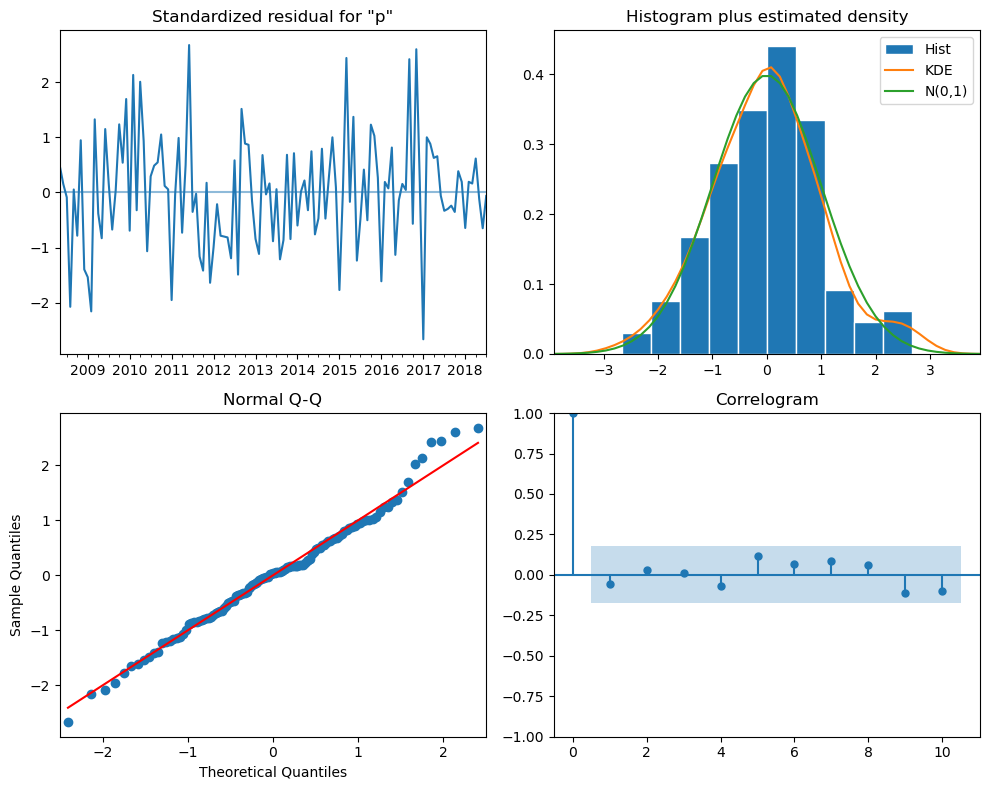

In [19]:
fig = res.plot_diagnostics(figsize=(10, 8))
fig.tight_layout()
fig.show()

In [10]:
test = np.log(test)

In [16]:
forecast = res.get_forecast(steps=len(test))
pred = forecast.predicted_mean

mae = mean_absolute_error(test, pred)
rmse = np.sqrt(mean_squared_error(test, pred))

print("ARIMA(1,0,1)x(1,0,1,12) - Dataset original")
print("MAE:", mae)
print("RMSE:", rmse)

ARIMA(1,0,1)x(1,0,1,12) - Dataset original
MAE: 0.02362277562236681
RMSE: 0.03209974971751489


In [20]:
conf_int = forecast.conf_int(alpha=0.05)
conf_int_exp = np.exp(conf_int)

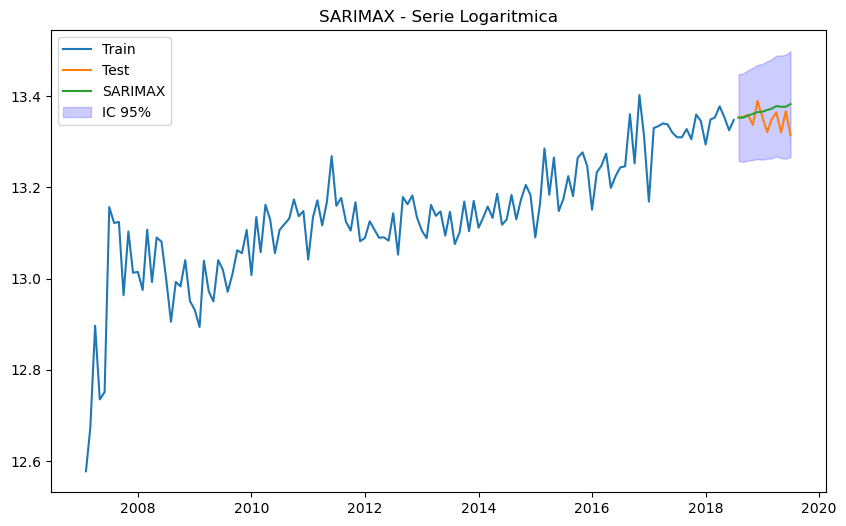

In [21]:
# Gráfico
plt.figure(figsize=(10,6))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(pred, label="SARIMAX")
plt.fill_between(
    conf_int.index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color="blue",
    alpha=0.2,
    label="IC 95%"
)
plt.legend()
plt.title("SARIMAX - Serie Logaritmica")
plt.show()

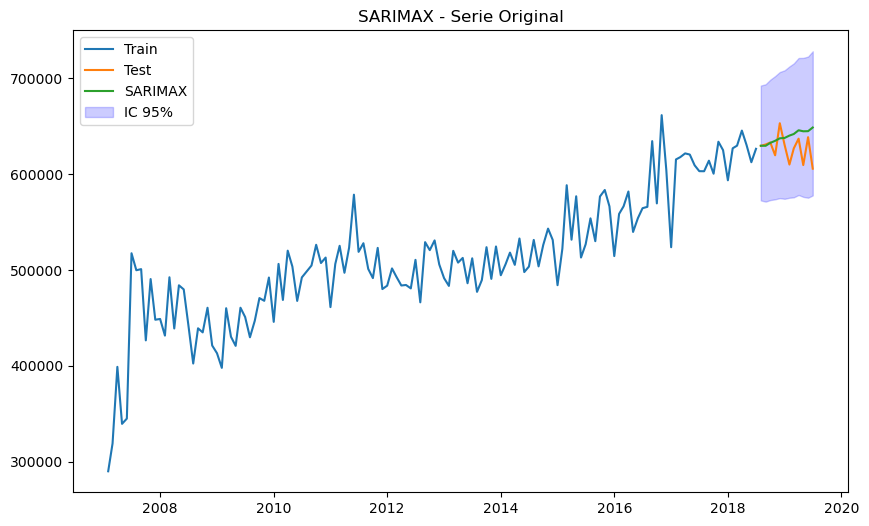

In [22]:
# Gráfico
plt.figure(figsize=(10,6))
plt.plot(np.exp(train), label="Train")
plt.plot(np.exp(test), label="Test")
plt.plot(np.exp(pred), label="SARIMAX")
plt.fill_between(
    conf_int_exp.index,
    conf_int_exp.iloc[:, 0],
    conf_int_exp.iloc[:, 1],
    color="blue",
    alpha=0.2,
    label="IC 95%"
)
plt.legend()
plt.title("SARIMAX - Serie Original")
plt.show()

In [24]:
# ==========================================
# Crear DataFrame con predicciones
# ==========================================

pred_summary = pd.DataFrame({
    "Predicción": pred,
    "IC_inf_95": conf_int_exp.iloc[:, 0],
    "IC_sup_95": conf_int_exp.iloc[:, 1]
})

# Añadir error estándar
pred_summary["Std_Error"] = (
    (pred_summary["IC_sup_95"] - pred_summary["IC_inf_95"]) / (2 * 1.96)
)

pred_summary.head()

,Predicción,IC_inf_95,IC_sup_95,Std_Error
2018-08-01,13.353178,572703.883236,692617.202016,30590.132342
2018-09-01,13.353063,571460.270191,693964.279473,31251.022776
2018-10-01,13.357903,573076.362532,698738.027850,32056.547275
2018-11-01,13.361276,573878.204644,702485.761718,32808.050274
2018-12-01,13.365366,575114.228100,706732.277959,33576.033127
